In [1]:
import findmycells

In [2]:
import shapely

shapely.__version__

'1.8.0'

In [3]:
from pathlib import Path
from findmycells.main import Project

from findmycells.preprocessing import CropStitchingArtefactsRGB, ConvertTo8Bit, MaximumIntensityProjection, MinimumIntensityProjection, CropToROIsBoundingBox, AdjustBrightnessAndContrast
from findmycells.segmentation import Deepflash2SemanticSegmentation, LosslessConversionOfDF2SemanticSegToInstanceSegWithCP
from findmycells.postprocessing import ReconstructCellsIn3DFrom2DInstanceLabels, ApplyExclusionCriteria
from findmycells.quantifications import CountFeaturesInWholeAreaROIs

In [4]:
project_root_dir = Path('/mnt/c/Users/dsege/TEMP/findmycells_projects/debugging_2/TH_in_SN_new_scanner/')

In [5]:
project_root_dir.is_dir()

True

In [6]:
segmentation_configs = {'cellpose': {'model_type': 'nuclei', #one of: 'cyto', 'cyto2', or 'nuclei'
                                     'net_avg': True}}

In [7]:
user_input_via_gui = {'project_root_dir': project_root_dir,  
                      'segmentation_configs': segmentation_configs,
                      'clear_temp_zarrs_from_sys_tmp': True}

In [8]:
th_in_sn = Project(user_input_via_gui)

In [9]:
th_in_sn.load_status()

In [10]:
th_in_sn.database.file_infos

{'file_id': ['0000',
  '0001',
  '0002',
  '0003',
  '0004',
  '0005',
  '0006',
  '0007',
  '0008',
  '0009',
  '0010',
  '0011',
  '0012',
  '0013',
  '0014',
  '0015',
  '0016',
  '0017',
  '0018',
  '0019',
  '0020',
  '0021',
  '0022',
  '0023',
  '0024',
  '0025',
  '0026',
  '0027',
  '0028',
  '0029',
  '0030',
  '0031',
  '0032',
  '0033',
  '0034',
  '0035',
  '0036',
  '0037',
  '0038',
  '0039',
  '0040',
  '0041',
  '0042',
  '0043',
  '0044',
  '0045',
  '0046',
  '0047',
  '0048',
  '0049',
  '0050',
  '0051',
  '0052',
  '0053',
  '0054',
  '0055',
  '0056',
  '0057',
  '0058',
  '0059'],
 'original_file_id': ['#21_2_SN_slice1',
  '#21_2_SN_slice2',
  '#21_2_SN_slice3',
  '#21_2_SN_slice4',
  '#21_2_SN_slice5',
  '#2_2_SN_slice1',
  '#2_2_SN_slice2',
  '#2_2_SN_slice3',
  '#2_2_SN_slice4',
  '#2_2_SN_slice5',
  '#2_2_SN_slice6',
  '#3_SN_slice1',
  '#3_SN_slice2',
  '#3_SN_slice3',
  '#3_SN_slice4',
  '#3_SN_slice5',
  '#3_SN_slice6',
  '#3_SN_slice7',
  '#4_2_SN_slice1

In [11]:
all_file_ids = ['0000']
for file_id in all_file_ids:
    th_in_sn.preprocess(strategies = [CropToROIsBoundingBox, CropStitchingArtefactsRGB, ConvertTo8Bit],
                        file_ids = [file_id], overwrite = True)
    th_in_sn.save_status()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/d/Dennis_Alex/findmycells_projects/TH_in_SN_new_scanner/00_microscopy_images/tg/#21_2/#21_2_SN_slice1.xlsx'

In [16]:
th_in_sn.segment(strategies = [Deepflash2SemanticSegmentation, LosslessConversionOfDF2SemanticSegToInstanceSegWithCP],
                overwrite = True)

Found 3 models in folder /mnt/c/Users/dsege/TEMP/findmycells_projects/for_debugging/03_segmentation_tool/trained_models
['Unet_resnet34_2classes-fold1.pth', 'Unet_resnet34_2classes-fold2.pth', 'Unet_resnet34_2classes-fold3.pth']


Predicting 0000-000.png


Predicting 0000-001.png


Predicting 0000-002.png


Predicting 0000-003.png


Predicting 0000-004.png


Predicting 0000-005.png


Predicting 0000-006.png


Predicting 0000-007.png


Predicting 0000-008.png


Predicting 0000-009.png


Predicting 0000-010.png


Predicting 0000-011.png


Predicting 0000-012.png


2022-05-16 22:32:59,382 [INFO] WRITING LOG OUTPUT TO /home/ds/.cellpose/run.log
2022-05-16 22:32:59,693 [INFO] ** TORCH CUDA version installed and working. **
2022-05-16 22:32:59,694 [INFO] >>>> using GPU
2022-05-16 22:32:59,809 [INFO] ~~~ FINDING MASKS ~~~
2022-05-16 22:33:06,566 [INFO] >>>> TOTAL TIME 6.76 sec
2022-05-16 22:33:09,350 [INFO] ** TORCH CUDA version installed and working. **
2022-05-16 22:33:09,351 [INFO] >>>> using GPU
2022-05-16 22:33:09,461 [INFO] ~~~ FINDING MASKS ~~~
2022-05-16 22:33:12,789 [INFO] >>>> TOTAL TIME 3.33 sec
2022-05-16 22:33:16,501 [INFO] ** TORCH CUDA version installed and working. **
2022-05-16 22:33:16,502 [INFO] >>>> using GPU
2022-05-16 22:33:16,598 [INFO] ~~~ FINDING MASKS ~~~
2022-05-16 22:33:20,079 [INFO] >>>> TOTAL TIME 3.48 sec
2022-05-16 22:33:23,562 [INFO] ** TORCH CUDA version installed and working. **
2022-05-16 22:33:23,563 [INFO] >>>> using GPU
2022-05-16 22:33:23,664 [INFO] ~~~ FINDING MASKS ~~~
2022-05-16 22:33:27,072 [INFO] >>>> TOTA

In [15]:
all_file_ids = th_in_sn.database.file_infos['file_id']
for file_id in all_file_ids:
    th_in_sn.postprocess(file_ids = [file_id],
                         strategies = [ReconstructCellsIn3DFrom2DInstanceLabels, ApplyExclusionCriteria], 
                         segmentations_to_use = 'instance', overwrite = True)
    th_in_sn.save_status()

Postprocessing segmentations of file ID: 0000 (1/1)
-Initializing 3D reconstruction from 2D instance segmentations
--matching ROIs across planes (1/13)
--matching ROIs across planes (2/13)
--matching ROIs across planes (3/13)
--matching ROIs across planes (4/13)
--matching ROIs across planes (5/13)
--matching ROIs across planes (6/13)
--matching ROIs across planes (7/13)
--matching ROIs across planes (8/13)
--matching ROIs across planes (9/13)
--matching ROIs across planes (10/13)
--matching ROIs across planes (11/13)
--matching ROIs across planes (12/13)
--matching ROIs across planes (13/13)
-applying exclusion criteria
Postprocessing segmentations of file ID: 0001 (1/1)
-Initializing 3D reconstruction from 2D instance segmentations
--matching ROIs across planes (1/13)
--matching ROIs across planes (2/13)
--matching ROIs across planes (3/13)
--matching ROIs across planes (4/13)
--matching ROIs across planes (5/13)
--matching ROIs across planes (6/13)
--matching ROIs across planes (7/1

In [17]:
th_in_sn.database.area_rois_for_quantification['0004']#['all_planes']['000']

{'all_planes': {'000': <shapely.geometry.polygon.Polygon at 0x7f9e6e55d110>}}

In [18]:
with open('rois_dict', "wb") as dict_file:
    pickle.dump(th_in_sn.database.area_rois_for_quantification['0004'], dict_file, pickle.HIGHEST_PROTOCOL)

In [15]:
import pickle

polygon = th_in_sn.database.area_rois_for_quantification['0004']['all_planes']['000']


# Save polygon to disc
with open('my_polygon', "wb") as poly_file:
    pickle.dump(polygon, poly_file, pickle.HIGHEST_PROTOCOL)

# Load polygon from disc
with open('my_polygon', "rb") as poly_file:
    loaded_polygon = pickle.load(poly_file)

loaded_polygon == th_in_sn.database.area_rois_for_quantification['0004']['all_planes']['000']

True

In [16]:
th_in_sn.database.quantified_segmentations_dir

PosixPath('/mnt/c/Users/dsege/TEMP/findmycells_projects/debugging_2/TH_in_SN_new_scanner/04_quantified_segmentations')

In [10]:
all_file_ids = th_in_sn.database.file_infos['file_id'].copy()

In [11]:
all_file_ids = all_file_ids[47:]
for file_id in all_file_ids:
    th_in_sn.quantify(file_ids = [file_id],
                      strategies = [CountFeaturesInWholeAreaROIs],
                      overwrite = True)
    th_in_sn.save_status()

Quantification of file ID: 0047 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0048 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0049 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0050 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0051 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0052 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0053 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0054 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0055 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0056 (1/1)
-counting the number of image features per region of interest


In [12]:
quantification_results = th_in_sn.database.quantification_results

In [13]:
quantification_results['CountFeaturesInWholeAreaROIs'].keys()

dict_keys(['0000', '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010', '0011', '0012', '0013', '0014', '0015', '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024', '0025', '0026', '0027', '0028', '0029', '0030', '0031', '0032', '0033', '0034', '0035', '0036', '0037', '0038', '0039', '0040', '0041', '0042', '0043', '0044', '0045', '0046', '0047', '0048', '0049', '0050', '0051', '0052', '0053', '0054', '0055', '0056', '0057', '0058', '0059'])

In [14]:
quantification_results['CountFeaturesInWholeAreaROIs']['0000']['000']

50

In [17]:
file_infos = th_in_sn.database.file_infos.copy()

In [18]:
th_in_sn.database.area_rois_for_quantification['0000']['all_planes']['000'].area

8214230.0

In [19]:
connected_components_3D = []
quantified_area_in_square_pixels = []
for file_id in file_infos['file_id']:
    connected_components_3D.append(quantification_results['CountFeaturesInWholeAreaROIs'][file_id]['000'])
    quantified_area_in_square_pixels.append(th_in_sn.database.area_rois_for_quantification[file_id]['all_planes']['000'].area)

In [20]:
micrometer_per_pixel = 2461.08/9408
square_micrometer_per_square_pixel = micrometer_per_pixel**2

z_step_size_in_micrometer = 1.5

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = {'file_id': file_infos['file_id'],
        'subject_id': file_infos['subject_id'],
        'group_id': file_infos['group_id'],
        'total_planes': file_infos['total_planes'],
        'connected_components_3D': connected_components_3D,
        'quantified_area_in_px^2': quantified_area_in_square_pixels}

df = pd.DataFrame(data = data)
        
df['quantified_area_in_mm^2'] = (df['quantified_area_in_px^2'] * square_micrometer_per_square_pixel) / 1000000
df['quantified_volume_in_mm^3'] = ((df['total_planes'] - 1) * z_step_size_in_micrometer) * df['quantified_area_in_mm^2']
df['cc3D_per_mm^3'] = df['connected_components_3D'] / df['quantified_volume_in_mm^3']

In [24]:
df.head()

,file_id,subject_id,group_id,total_planes,connected_components_3D,quantified_area_in_px^2,quantified_area_in_mm^2,quantified_volume_in_mm^3,cc3D_per_mm^3
0,0000,#21_2,tg,13,50,8214230.0,0.562113,10.118036,4.941671
1,0001,#21_2,tg,13,67,7108096.0,0.486419,8.755534,7.652303
2,0002,#21_2,tg,13,39,3987072.0,0.272842,4.911153,7.941109
3,0003,#21_2,tg,13,37,6774912.0,0.463618,8.345128,4.433725
4,0004,#21_2,tg,13,82,8760096.0,0.599468,10.790417,7.599336


<AxesSubplot:xlabel='group_id', ylabel='connected_components_3D'>

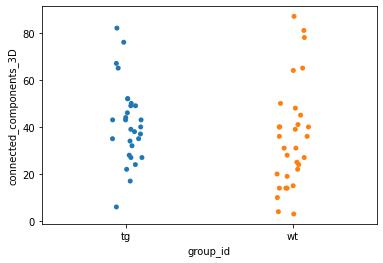

In [28]:
sns.stripplot(data=df, x='group_id', y='connected_components_3D')

In [169]:
df_human_counts = pd.read_excel('Transfer_sheet_deepflash2_Judith_MCC950_animals.xlsx')

In [170]:
df_tg = df_human_counts.iloc[:, 0:5].copy()

In [171]:
df_tg.columns = df_tg.iloc[1].values
df_tg = df_tg.iloc[2:, :]
df_tg = df_tg.dropna(axis=0, how='all')
df_tg['slice'].fillna('', inplace=True)

In [172]:
new_names = []
for slice_name in df_tg.loc[df_tg['slice'].str.startswith('#3_2_'), 'slice'].values:
    new_names.append(slice_name.replace('3_2', '3'))
df_tg.loc[df_tg['slice'].str.startswith('#3_2_'), 'slice'] = new_names

In [173]:
new_names = []
for slice_name in df_tg.loc[df_tg['slice'].str.startswith('#21'), 'slice'].values:
    new_names.append(slice_name.replace('21', '21_2'))
df_tg.loc[df_tg['slice'].str.startswith('#21'), 'slice'] = new_names

In [174]:
df_tg.drop(index = df_tg.loc[df_tg['slice'].str.startswith('#4')].index, inplace = True)
df_tg.drop(index = df_tg.loc[df_tg['human clicks'].isna()].index, inplace = True)

In [175]:
df_wt = df_human_counts.iloc[:, 6:].copy()
df_wt.columns = df_wt.iloc[1].values
df_wt = df_wt.iloc[2:, :]

In [176]:
df_wt = df_wt.dropna(axis=0, how='all')
df_wt.drop(index = df_wt.loc[df_wt['human clicks'].isna()].index, inplace = True)
df_wt

,animal,slice,human clicks,excluded slices,estimated number all slices
2,#11,#11_SN_slice1,56,NaN,6533
3,NaN,#11_SN_slice2,37,NaN,NaN
4,NaN,#11_SN_slice3,35,NaN,NaN
5,NaN,#11_SN_slice4,27,NaN,NaN
6,NaN,#11_SN_slice5,12,NaN,NaN
9,#12,#12_SN_slice1,68,NaN,6523
10,NaN,#12_SN_slice2,36,NaN,NaN
11,NaN,#12_SN_slice3,71,NaN,NaN
12,NaN,#12_SN_slice4,21,NaN,NaN
13,NaN,#12_SN_slice5,4,NaN,NaN


In [177]:
df_human = pd.concat([df_tg, df_wt])

In [197]:
cc3d = []
cc3d_per_volume = []
group_ids = []
animal_ids = []
slice_ids_to_remove = []
for slice_id in df_human['slice'].unique():
    if slice_id in file_infos['original_file_id']:
        file_id = file_infos['file_id'][file_infos['original_file_id'].index(slice_id)]
        cc3d.append(df.loc[df['file_id'] == file_id, 'connected_components_3D'].values[0])
        cc3d_per_volume.append(df.loc[df['file_id'] == file_id, 'cc3D_per_mm^3'].values[0])
        group_ids.append(df.loc[df['file_id'] == file_id, 'group_id'].values[0])
        animal_ids.append(df.loc[df['file_id'] == file_id, 'subject_id'].values[0])
    else:
        slice_ids_to_remove.append(slice_id)

In [198]:
df_human['findmycells_cc3d'] = cc3d
df_human['findmycells_cc3d_per_mm^3'] = cc3d_per_volume
df_human['subject_id'] = animal_ids
df_human['group_id'] = group_ids

In [199]:
df_human['human clicks'] = df_human['human clicks'].astype('int64')
df_human.dtypes

animal                           object
slice                            object
human clicks                      int64
excluded slices                  object
 estimated number all slices     object
findmycells_cc3d                  int64
findmycells_cc3d_per_mm^3       float64
subject_id                       object
group_id                         object
dtype: object

In [202]:
for subject_id in df_human['subject_id'].unique():
    df_temp = df_human.loc[df_human['subject_id'] == subject_id].copy()
    corr = df_temp['human clicks'].corr(df_temp['findmycells_cc3d'])
    print(f'Correlation for {subject_id}: {corr}')

Correlation for #2_2: 0.5424833044090799
Correlation for #3: 0.39872973063258343
Correlation for #5: -0.29164196476377996
Correlation for #21_2: 0.0029948470071396002
Correlation for #11: -0.7116141657574985
Correlation for #12: -0.6239283892750567
Correlation for #13: -0.5811658735910988
Correlation for #14: -0.15889853764037204
Correlation for #15: -0.3051288168242173


In [204]:
for group_id in df_human['group_id'].unique():
    df_temp = df_human.loc[df_human['group_id'] == group_id].copy()
    corr = df_temp['human clicks'].corr(df_temp['findmycells_cc3d'])
    print(f'Correlation for {group_id}: {corr}')

Correlation for tg: 0.2528499224806199
Correlation for wt: -0.4312591463584838


<AxesSubplot:xlabel='human clicks', ylabel='findmycells_cc3d'>

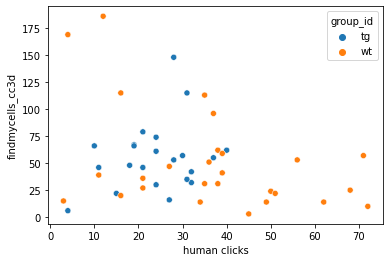

In [209]:
sns.scatterplot(data = df_human, x='human clicks', y='findmycells_cc3d', hue='group_id')

In [218]:
from skimage.io import imread

In [230]:
file_id = '0033'

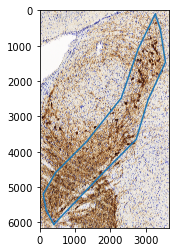

In [231]:
image = imread(f'/mnt/d/Dennis_Alex/findmycells_projects/TH_in_SN_new_scanner/02_preprocessed_images/{file_id}-004.png')
roi_coords = th_in_sn.database.area_rois_for_quantification[file_id]['all_planes']['000'].boundary.coords.xy
plt.imshow(image)
plt.plot(roi_coords[1], roi_coords[0])

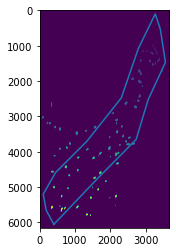

In [233]:
image = imread(f'/mnt/d/Dennis_Alex/findmycells_projects/TH_in_SN_new_scanner/03c_instance_segmentations/{file_id}-004.png')
roi_coords = th_in_sn.database.area_rois_for_quantification[file_id]['all_planes']['000'].boundary.coords.xy
plt.imshow(image)
plt.plot(roi_coords[1], roi_coords[0])

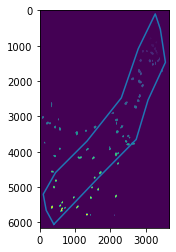

In [234]:
image = imread(f'/mnt/d/Dennis_Alex/findmycells_projects/TH_in_SN_new_scanner/03c_instance_segmentations/{file_id}-005.png')
roi_coords = th_in_sn.database.area_rois_for_quantification[file_id]['all_planes']['000'].boundary.coords.xy
plt.imshow(image)
plt.plot(roi_coords[1], roi_coords[0])

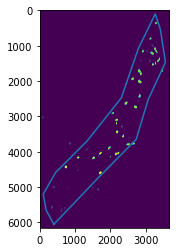

In [241]:
image = imread(f'/mnt/d/Dennis_Alex/findmycells_projects/TH_in_SN_new_scanner/04_quantified_segmentations/000/{file_id}-004_postprocessed_segmentations.png')
area = th_in_sn.database.area_rois_for_quantification[file_id]['all_planes']['000']
roi_coords = area.boundary.coords.xy
plt.imshow(image)
plt.plot(roi_coords[1], roi_coords[0])

In [254]:
th_in_sn.postprocess(file_ids = ['0033'], strategies = [ApplyExclusionCriteria], segmentations_to_use = 'instance', overwrite = True)

Postprocessing segmentations of file ID: 0033 (1/1)
-applying exclusion criteria


In [265]:
from typing import Dict

def get_instance_label_info(postprocessed_segmentations: np.ndarray, area_roi_dict: Dict) -> Dict:
    instance_label_ids = list(np.unique(postprocessed_segmentations))
    for background_label in [0, 0.0]:
        if background_label in instance_label_ids:
            instance_label_ids.remove(background_label)
    instance_label_info = dict()
    for label_id in instance_label_ids:
        print(f'intializing {label_id}')
        instance_label_info[label_id] = dict()
        plane_indices_with_label_id = list(set(np.where(postprocessed_segmentations == label_id)[0]))
        instance_label_info[label_id]['plane_indices_with_label_id'] = plane_indices_with_label_id
    instance_label_info = extend_info_with_relative_positions(info = instance_label_info, 
                                                                   rois_dict = area_roi_dict,
                                                                   zstack = postprocessed_segmentations)
    return instance_label_info


def extend_info_with_relative_positions(info: Dict, rois_dict: Dict, zstack: np.ndarray) -> Dict:
    for label_id in info.keys():
        print(f' extending: {label_id}')
        info[label_id]['area_roi_ids_with_matching_plane_index_and_id'] = list()
        info[label_id]['relative_positions_per_area_roi_id'] = dict()
        for plane_index in info[label_id]['plane_indices_with_label_id']:
            if plane_index in rois_dict.keys():
                for area_roi_id in rois_dict[plane_index]:
                    if (area_roi_id, plane_index, plane_index) not in info[label_id]['area_roi_ids_with_matching_plane_index_and_id']:
                        info[label_id]['area_roi_ids_with_matching_plane_index_and_id'].append((area_roi_id, plane_index, plane_index))
            if 'all_planes' in rois_dict.keys(): # no elif, since there might be some ROIs assigned to single planes and others for the entire stack
                for area_roi_id in rois_dict['all_planes']:
                    if (area_roi_id, plane_index, 'all_planes') not in info[label_id]['area_roi_ids_with_matching_plane_index_and_id']:
                        info[label_id]['area_roi_ids_with_matching_plane_index_and_id'].append((area_roi_id, plane_index, 'all_planes'))
        for area_roi_id, plane_index, plane_id in info[label_id]['area_roi_ids_with_matching_plane_index_and_id']:
            roi = get_polygon_from_instance_segmentation(single_plane = zstack[plane_index], label_id = label_id)
            area_roi = rois_dict[plane_id][area_roi_id]
            relative_position = get_relative_position(roi_to_check = roi, reference = area_roi)
            if area_roi_id not in info[label_id]['relative_positions_per_area_roi_id'].keys():
                info[label_id]['relative_positions_per_area_roi_id'][area_roi_id] = {'relative_positions': list(),
                                                                                     'plane_indices': list()}
            info[label_id]['relative_positions_per_area_roi_id'][area_roi_id]['relative_positions'].append(relative_position)
            info[label_id]['relative_positions_per_area_roi_id'][area_roi_id]['plane_indices'].append(plane_index)
        for area_roi_id in info[label_id]['relative_positions_per_area_roi_id'].keys():
            relative_positions = list(set(info[label_id]['relative_positions_per_area_roi_id'][area_roi_id]['relative_positions']))
            if 'within' in relative_positions:
                final_relative_position_for_quantifications = 'within'
            elif 'intersects' in relative_positions:
                final_relative_position_for_quantifications = 'intersects'
            elif 'touches' in relative_positions:
                final_relative_position_for_quantifications = 'touches'
            else:
                final_relative_position_for_quantifications = 'no_overlap'
            info[label_id]['relative_positions_per_area_roi_id'][area_roi_id]['final_relative_position_for_quantifications'] = final_relative_position_for_quantifications
    return info


def get_relative_position(roi_to_check: Polygon, reference: Polygon) -> str:
    if roi_to_check.within(reference):
        rel_position = 'within'
    elif roi_to_check.intersects(reference):
        rel_position = 'intersects'
    elif roi_to_check.touches(reference):
        rel_position = 'touches'
    else:
        rel_position = 'no_overlap'
    return rel_position

In [260]:
from findmycells.utils import load_zstack_as_array_from_single_planes
from pathlib import Path

In [280]:
area_roi_dict = th_in_sn.database.area_rois_for_quantification['0033'].copy()

In [277]:
from shapely.geometry import Polygon

In [279]:
false_area_roi = Polygon([(0, 0), (1, 0), (1, 1), (0, 1), (0, 0)])

In [285]:
false_area_roi_dict = area_roi_dict.copy()
false_area_roi_dict['all_planes']['000'] = false_area_roi

In [286]:
postprocessed_segmentations = load_zstack_as_array_from_single_planes(path = Path('/mnt/d/Dennis_Alex/findmycells_projects/TH_in_SN_new_scanner/03c_instance_segmentations/'),
                                                                      file_id = '0033')

In [287]:
instance_label_info = get_instance_label_info(postprocessed_segmentations = postprocessed_segmentations, area_roi_dict = false_area_roi_dict)

intializing 1
intializing 2
intializing 3
intializing 4
intializing 5
intializing 6
intializing 7
intializing 8
intializing 9
intializing 10
intializing 11
intializing 12
intializing 13
intializing 14
intializing 15
intializing 16
intializing 17
intializing 18
intializing 19
intializing 20
intializing 21
intializing 22
intializing 23
intializing 24
intializing 25
intializing 26
intializing 27
intializing 28
intializing 29
intializing 30
intializing 31
intializing 32
intializing 33
intializing 34
intializing 35
intializing 36
intializing 37
intializing 38
intializing 39
intializing 40
intializing 41
intializing 42
intializing 43
intializing 44
intializing 45
intializing 46
intializing 47
intializing 48
intializing 49
intializing 50
intializing 51
intializing 52
intializing 53
intializing 54
intializing 55
intializing 56
intializing 57
intializing 58
intializing 59
intializing 60
intializing 61
intializing 62
intializing 63
intializing 64
intializing 65
intializing 66
intializing 67
inti

In [288]:
instance_label_info

{1: {'plane_indices_with_label_id': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  'area_roi_ids_with_matching_plane_index_and_id': [('000', 0, 'all_planes'),
   ('000', 1, 'all_planes'),
   ('000', 2, 'all_planes'),
   ('000', 3, 'all_planes'),
   ('000', 4, 'all_planes'),
   ('000', 5, 'all_planes'),
   ('000', 6, 'all_planes'),
   ('000', 7, 'all_planes'),
   ('000', 8, 'all_planes'),
   ('000', 9, 'all_planes'),
   ('000', 10, 'all_planes'),
   ('000', 11, 'all_planes'),
   ('000', 12, 'all_planes')],
  'relative_positions_per_area_roi_id': {'000': {'relative_positions': ['no_overlap',
     'no_overlap',
     'no_overlap',
     'no_overlap',
     'no_overlap',
     'no_overlap',
     'no_overlap',
     'no_overlap',
     'no_overlap',
     'no_overlap',
     'no_overlap',
     'no_overlap',
     'no_overlap'],
    'plane_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'final_relative_position_for_quantifications': 'no_overlap'}}},
 2: {'plane_indices_with_label_id': [0, 1,

In [273]:
for label_id in instance_label_info.keys():
    if instance_label_info[label_id]['relative_positions_per_area_roi_id']['000']['final_relative_position_for_quantifications'] not in ['within', 'intersects']:
        print(label_id)

86
92
93


In [274]:
postprocessed_zstack = load_zstack_as_array_from_single_planes(path = Path('/mnt/d/Dennis_Alex/findmycells_projects/TH_in_SN_new_scanner/04_quantified_segmentations/000/'), file_id = '0033')

In [275]:
np.unique(postprocessed_zstack)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 87, 88, 89, 90], dtype=uint8)

In [242]:
import numpy as np
from skimage import measure
from shapely.geometry import Polygon
from shapely.validation import make_valid

def get_polygon_from_instance_segmentation(single_plane: np.ndarray, label_id: int) -> Polygon:
    x_dim, y_dim = single_plane.shape
    tmp_array = np.zeros((x_dim, y_dim), dtype='uint8')
    tmp_array[np.where(single_plane == label_id)] = 1
    tmp_contours = measure.find_contours(tmp_array, level = 0)[0]
    roi = Polygon(tmp_contours)
    if roi.is_valid == False:
        roi = make_valid(roi)
    return roi

In [247]:
withins, intersects, outsiders = [], [], []
for label_id in np.unique(image):
    if label_id != 0:
        roi = get_polygon_from_instance_segmentation(single_plane = image, label_id = label_id)
        if roi.within(area):
            withins.append(label_id)
        elif roi.intersects(area):
            intersects.append(label_id)
        else:
            outsiders.append(label_id)

In [248]:
withins

[1,
 5,
 12,
 15,
 16,
 18,
 21,
 30,
 32,
 33,
 34,
 37,
 38,
 45,
 46,
 47,
 48,
 52,
 60,
 61,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 220,
 221,
 223,
 224,
 225,
 227,
 228,
 229,
 232,
 236,
 238,
 240,
 242,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 253,
 255]

In [249]:
intersects

[219, 239]

In [250]:
outsiders

[57, 58]

In [252]:
th_in_sn.database.area_rois_for_quantification['0000']

{'all_planes': {'000': <shapely.geometry.polygon.Polygon at 0x7fbf7c2cf760>}}

<AxesSubplot:xlabel='group_id', ylabel='quantified_volume_in_mm^3'>

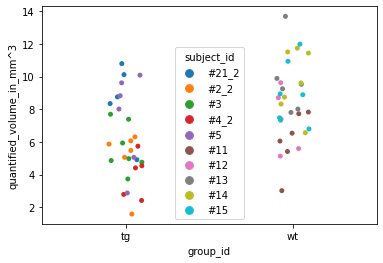

In [77]:
sns.stripplot(data=df, x='group_id', y='quantified_volume_in_mm^3', hue='subject_id')

<AxesSubplot:xlabel='group_id', ylabel='connected_components_3D'>

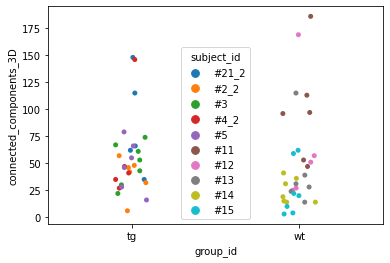

In [75]:
sns.stripplot(data=df, x='group_id', y='connected_components_3D', hue='subject_id')

<AxesSubplot:xlabel='group_id', ylabel='cc3D_per_mm^3'>

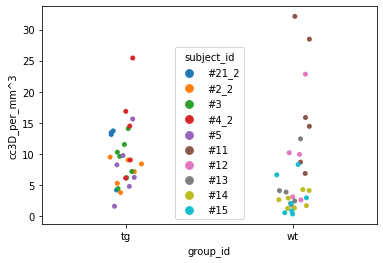

In [80]:
sns.stripplot(data=df, x='group_id', y='cc3D_per_mm^3', hue='subject_id')

In [ ]:
sns.stripplot(data=df, x='group_id', y='connected_components_3D', hue='subject_id')

In [29]:
means = {'data': [],
         'group_id': []}

for subject_id in df['subject_id'].unique():
    group_id = df.loc[df['subject_id'] == subject_id, 'group_id'].values[0]
    means['data'].append(df.loc[df['subject_id'] == subject_id, 'cc3D_per_mm^3'].mean())
    means['group_id'].append(group_id)

df_means = pd.DataFrame(data = means)

<AxesSubplot:xlabel='group_id', ylabel='data'>

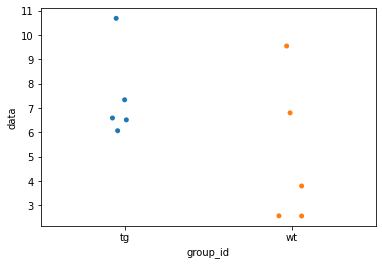

In [30]:
sns.stripplot(data=df_means, x='group_id', y='data')

In [31]:
df_means

,data,group_id
0,6.513629,tg
1,6.589393,tg
2,7.338061,tg
3,10.685641,tg
4,6.066847,tg
5,9.548332,wt
6,6.800788,wt
7,3.795100,wt
8,2.561330,wt
9,2.568218,wt


In [ ]:
        'quantified_volumne_in_px^3': [],
        'cc3D_normalized_to_volume': []

In [44]:
1_000_000 == 1000000

True

In [39]:
(9408**2)/(2461.08**2)

14.613126882848189

In [17]:
file_infos = th_in_sn.database.file_infos

In [34]:
th_in_sn.save_status()

In [12]:
all_file_ids = ['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010']
for file_id in all_file_ids:
    if file_id != '0000':
        th_in_sn.quantify(file_ids = [file_id],
                          strategies = [CountFeaturesInWholeAreaROIs])
        th_in_sn.save_status()

Quantification of file ID: 0001 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0002 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0003 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0004 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0005 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0006 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0007 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0008 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0009 (1/1)
-counting the number of image features per region of interest
Quantification of file ID: 0010 (1/1)
-counting the number of image features per region of interest


In [ ]:
all_file_ids = th_in_sn.database.file_infos['file_id'].copy()
for file_id in all_file_ids:
    if file_id != '0000':
        th_in_sn.quantify(file_ids = [file_id],
                          strategies = [CountFeaturesInWholeAreaROIs])
        th_in_sn.save_status()

In [29]:
th_in_sn.quantify(file_ids = ['0000'], strategies = [CountFeaturesInWholeAreaROIs])

Quantification of file ID: 0000 (1/1)
-counting the number of image features per region of interest


In [13]:
th_in_sn.database.quantification_results

{'CountFeaturesInWholeAreaROIs': {'0000': {'000': 62},
  '0001': {'000': 115},
  '0002': {'000': 66},
  '0003': {'000': 35},
  '0004': {'000': 148},
  '0005': {'000': 57},
  '0006': {'000': 48},
  '0007': {'000': 42},
  '0008': {'000': 46},
  '0009': {'000': 6},
  '0010': {'000': 32}}}

In [15]:
all_file_ids = th_in_sn.database.file_infos['file_id'].copy()
for file_id in all_file_ids:
    th_in_sn.postprocess(file_ids = [file_id],
                         strategies = [ReconstructCellsIn3DFrom2DInstanceLabels, ApplyExclusionCriteria], 
                         segmentations_to_use = 'instance')
    th_in_sn.save_status()

Postprocessing segmentations of file ID: 0000 (1/1)


AttributeError: 'Database' object has no attribute 'area_rois_for_quantification'

In [ ]:
all_file_ids = th_in_sn.database.file_infos['file_id'].copy()
for file_id in all_file_ids:
    th_in_sn.quantify(file_ids = [file_id],
                      strategies = [CountFeaturesInWholeAreaROIs])
    th_in_sn.save_status()